In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from math import sin
from numpy import linalg
import numpy as np
import cmath
import pandas as pd
import seaborn as sns

In [2]:
#Уравнение для консервативной системы
def pendula (freq):
    def rhs(t, X):
        x, y = X
        return [y, -sin(x)+0.5]
    return rhs

#Построение векторного поля
def eq_quiver(rhs, limits, N=16):
    xlims, ylims = limits
    xs=np.linspace(xlims[0], xlims[1], N)
    ys=np.linspace(ylims[0], ylims[1], N)
    U=np.zeros((N, N))
    V=np.zeros((N, N))
    for i, y in enumerate(ys):
        for j, x in enumerate(xs):
            vfield=rhs(0., [x,y])
            u, v =vfield
            U[i, j]=u
            V[i, j]=v
    return xs, ys, U, V

In [3]:
#Матрица Якоби для консервативной системы
def jcb_conserve(x, y):
    return np.array([[0.0, 1.0], [-1*np.cos(x), 0.0]])

In [4]:
#Матрица Якоби для системы с диссипацией
def jcb_nonconserve(x, y, a):
    return np.array([[0, 1], [-1*np.cos(x), -a]])

In [5]:
#Нпхождение собственных векторов
def selfvect(x, y, a):
    if a == 0:
        A=jcb_conserve(x, y)
    else:
        A=jcb_nonconserve(x, y, a)
    w, v=linalg.eig(A)
    r=v[0, 0:]
    x1normed=v[0, 0]/(np.sqrt((v[0, 0])**2+(v[0, 1]**2)))
    y1normed=v[0, 1]/(np.sqrt((v[0, 0])**2+(v[0, 1]**2)))
    x2normed=v[1, 0]/(np.sqrt((v[0, 0])**2+(v[0, 1]**2)))
    y2normed=v[1, 1]/(np.sqrt((v[0, 0])**2+(v[0, 1]**2)))
    return [w, [[x1normed, y1normed], [x2normed, y2normed]]]


In [6]:
#Устойчивость состояния равновесия
def stability(x, y, a):
        r=selfvect(x, y, a)
        w1=complex(r[0][0])
        w2=complex(r[0][1])
        if (w1.real <= 0 and w2.real <= 0):
            return ('bo')
        elif (w1.imag==0 and w2.imag==0 and ((w1.real > 0 and w2.real < 0) or (w1.real<0 and w2.real>0))):
            return ('r+')
        elif (w1.imag!=0 and w1.real > 0 and w2.real > 0):
            return ('r+')
        elif (w1.imag==0 and w1.real > 0 and w2.real > 0):
            return ('r+')
#Сепаратрисы 
def seps(x, y, a):
    r=selfvect(x, y, a)
    x1=x+r[1][0][0]*0.0001
    x2=x+r[1][1][0]*0.0001
    y1=y+r[1][0][1]*0.0001
    y2=y+r[1][1][1]*0.0001
    x12=x-r[1][0][0]*0.0001
    y12=y-r[1][0][1]*0.0001
    x22=x-r[1][1][0]*0.0001
    y22=y-r[1][1][1]*0.0001
    return ([(x1, y1), (x2, y2), (x12, y12), (x22, y22), 'y-'])

In [7]:
#Отмечаем состояния равновесия на фазовой плоскости
def balance(a):
    plt.plot(np.pi/6, 0, stability(np.pi/6, 0, a))
    plt.plot(np.pi*5/6, 0, stability(np.pi*5/6, 0, a))

In [8]:
#Строим траектории
def plotOnPlane2(rhs, pts, times, limits, modes, a):
    ab = []
    ac = []
    xlims, ylims=limits
    plt.figure(figsize=(15, 10))
    plt.xlim([xlims[0], xlims[1]])
    plt.ylim([ylims[0], ylims[1]])
    xs, ys, U, V =eq_quiver(rhs, limits, 16)
    plt.quiver(xs, ys, U, V, alpha=0.8)
    balance(a)
    for pt, maxT, mode in zip(pts, times, modes):
        sol=solve_ivp(rhs, [0, maxT], pt, method='RK45', rtol=1e-12)
        xs, ys=sol.y
        ac.append(sol.t)
        ab.append(xs)
        plt.plot(xs, ys, mode) 
    return [ac, ab]

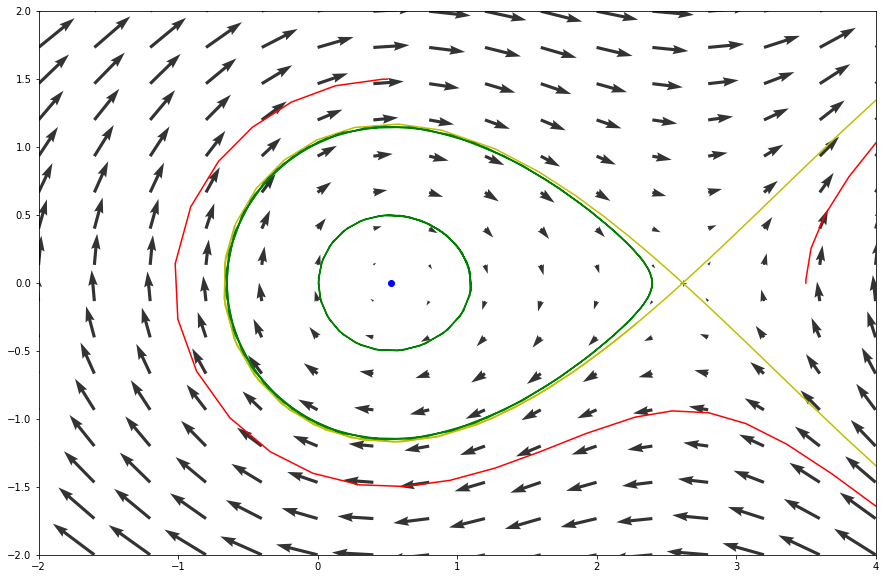

In [9]:
#Фазовый портрет для консервативной системы
freq=1
rhs=pendula(freq)
limits=[(-2.0, 4.0), (-2.0, 2.0)]
dep0 = plotOnPlane2(rhs, [(np.pi*5/6, 0), (np.pi*6, 0), seps(np.pi*5/6, 0, 0)[0], seps(np.pi*5/6, 0, 0)[1], seps(np.pi*5/6, 0, 0)[2], seps(np.pi*5/6, 0, 0)[3], (0.5, 0.5), (0.5, 1.5), (3.5, 0), (2.4, 0.0), (2.4, 0.0), (1.5, 0.0)],
             [20, 20, 17, 17, -17, -17, 16, -17, 17, -17, 17], 
             limits, 
             ['b-', 'b-', 'y-', 'y-', 'y-', 'y-', 'g-', 'r-', 'r-', 'g-', 'g-'], 0)

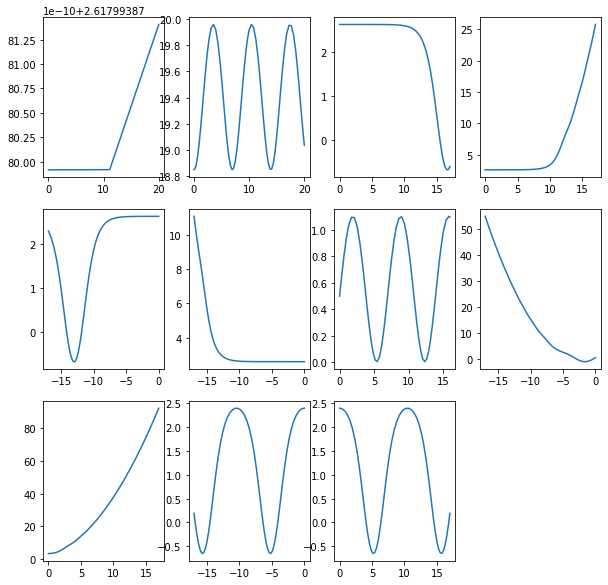

In [11]:
plt.figure(figsize=(10, 10))
for k in range(len(dep0[0])):
    x=dep0[1][k]
    t=dep0[0][k]
    plt.subplot(3, 4, k+1)
    plt.plot(t, x)

In [13]:
a=0.1
#Уравнение для системы со слабым трением (a>0)
def pendula1(freq):
    def rhs(t, X):
        x, y = X
        return [y, -a*y-sin(x)+0.5]
    return rhs

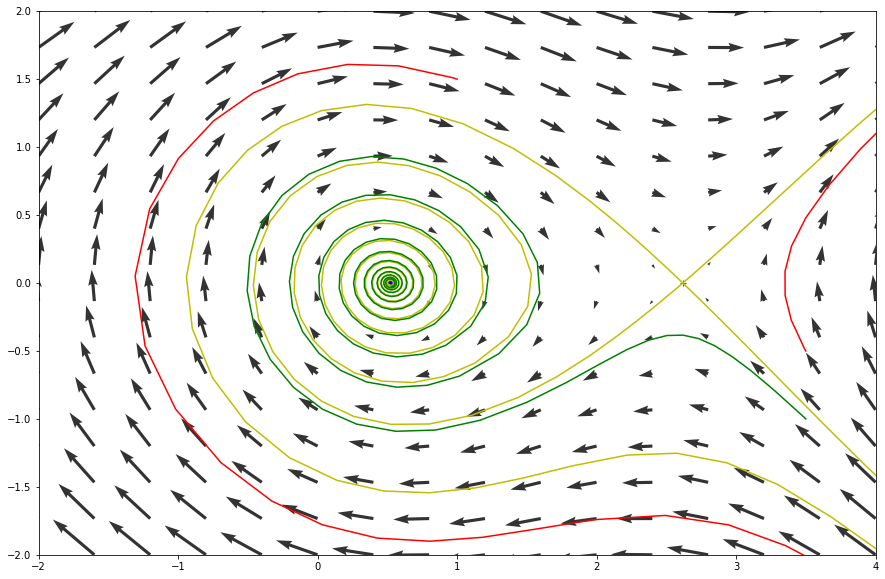

In [14]:
#Фазовый портрет для системы со слабым трением (a>0)
freq=1
rhs=pendula1(freq)
limits=[(-2.0, 4.0), (-2.0, 2.0)]
dep1 = plotOnPlane2(rhs, [seps(np.pi*5/6, 0, a)[0], seps(np.pi*5/6, 0, a)[1], seps(np.pi*5/6, 0, a)[2], seps(np.pi*5/6, 0, a)[3], (1.0, 1.5), (3.5, -1), (3.5, -0.5)],
             [200, -40, 100, -60, -40, 80, 20], 
             limits, 
             [seps(np.pi*5/6, 0, a)[4], seps(np.pi*5/6, 0, a)[4], seps(np.pi*5/6, 0, a)[4], seps(np.pi*5/6, 0, -0.01)[4], 'r-', 'g-', 'r-'], a)

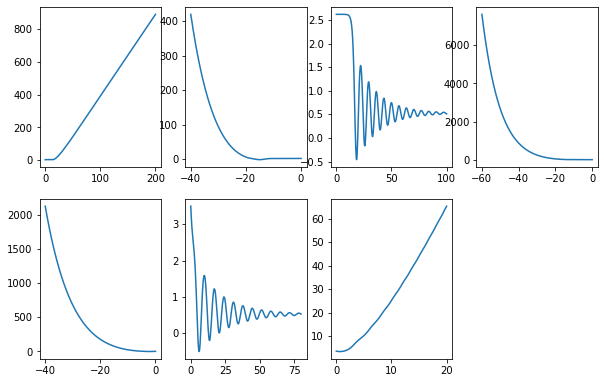

In [17]:
plt.figure(figsize=(10, 10))
for k in range(len(dep1[0])):
    x=dep1[1][k]
    t=dep1[0][k]
    plt.subplot(3, 4, k+1)
    plt.plot(t, x)

In [18]:
b=-0.07
#Уравнение для системы со слабым притоком энергии (b<0):
def pendula2(freq):
    def rhs(t, X):
        x, y = X
        return [y, -b*y-sin(x)+0.5]
    return rhs

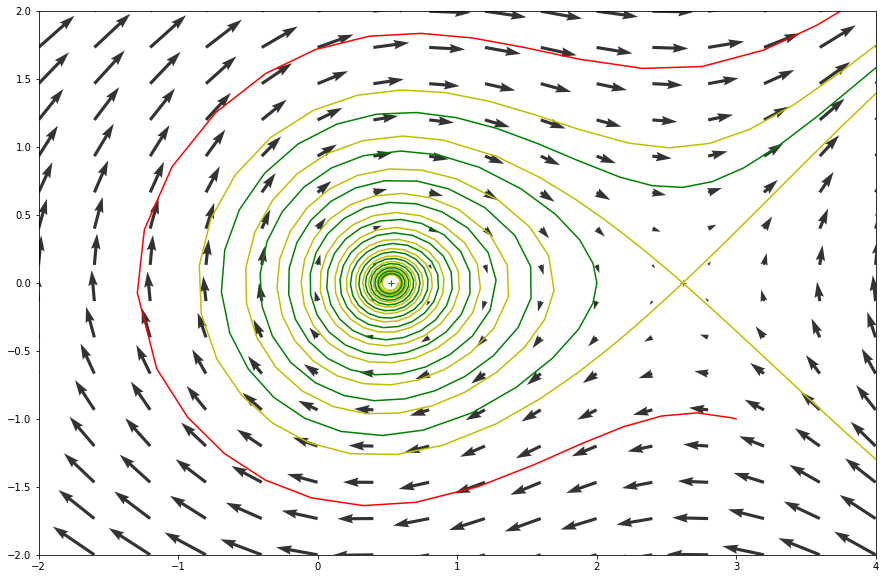

In [19]:
#Фазовый портрет для системы со слабым притоком энергии (b<0):
freq=1
rhs=pendula2(freq)
limits=[(-2.0, 4.0), (-2.0, 2.0)]
dep2 = plotOnPlane2(rhs, [seps(np.pi*5/6, 0, b)[0], seps(np.pi*5/6, 0, b)[1], seps(np.pi*5/6, 0, b)[2], seps(np.pi*5/6, 0, b)[3], (2, 0), (2, 0), (3, -1)],
             [50, -70, 120, -100, 80, -80, 50], 
             limits, 
             [seps(np.pi*5/6, 0, b)[4], seps(np.pi*5/6, 0, b)[4], seps(np.pi*5/6, 0, b)[4], seps(np.pi*5/6, 0, b)[4], 'g-', 'g-', 'r-'], b)

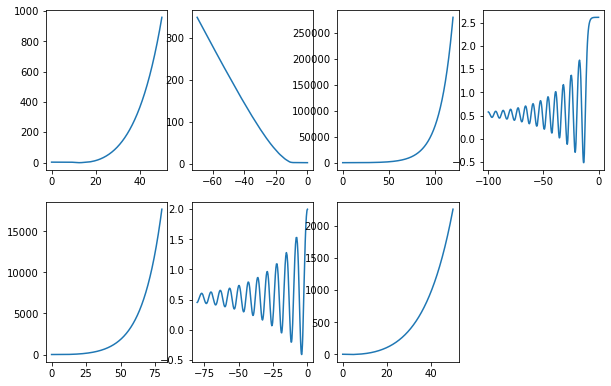

In [20]:
plt.figure(figsize=(10, 10))
for k in range(len(dep2[0])):
    x=dep2[1][k]
    t=dep2[0][k]
    plt.subplot(3, 4, k+1)
    plt.plot(t, x)

In [21]:
c=2
#Уравнение для системы с сильным трением(c>>0)
def pendula3(freq):
    def rhs(t, X):
        x, y = X
        return [y, -c*y-sin(x)+0.5]
    return rhs

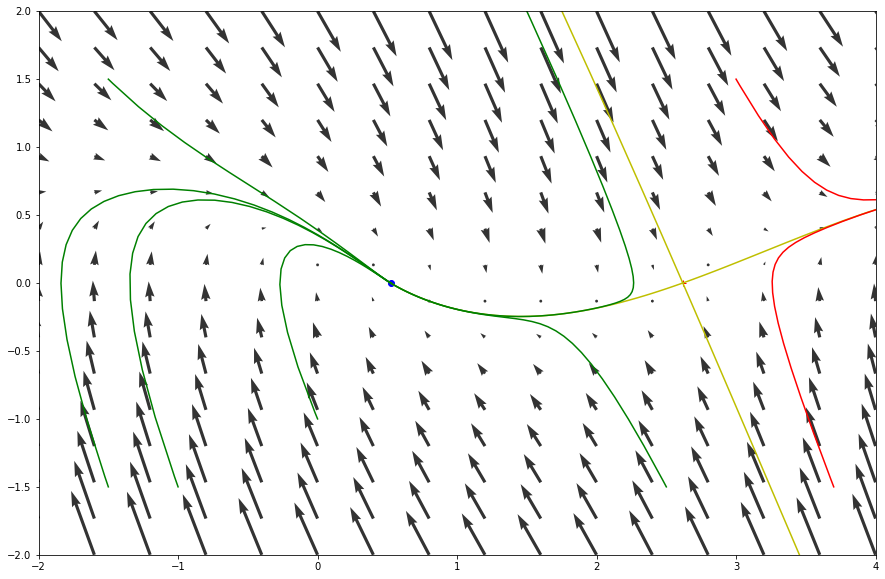

In [22]:
#Фазовый портрет для системы с сильным трением (c>>0)
freq=1
rhs=pendula3(freq)
limits=[(-2.0, 4.0), (-2.0, 2.0)]
dep4 = plotOnPlane2(rhs, [seps(np.pi*5/6, 0, c)[0], seps(np.pi*5/6, 0, c)[1], seps(np.pi*5/6, 0, c)[2], seps(np.pi*5/6, 0, c)[3], (-1.5, 1.5), (2.5, -1.5), (-1, -1.5), (0, -1), (-1.5, -1.5), (3, 1.5), (3.7, -1.5), (1.5, 2)],
             [-20, 70, -20, 90, 20, 40, 20, 20, 20, 20, 20, 20], 
             limits, 
             [seps(np.pi*5/6, 0, c)[4], seps(np.pi*5/6, 0, c)[4], seps(np.pi*5/6, 0, c)[4], seps(np.pi*5/6, 0, c)[4], 'g-', 'g-', 'g-', 'g-', 'g-', 'r-', 'r-', 'g-'], c)

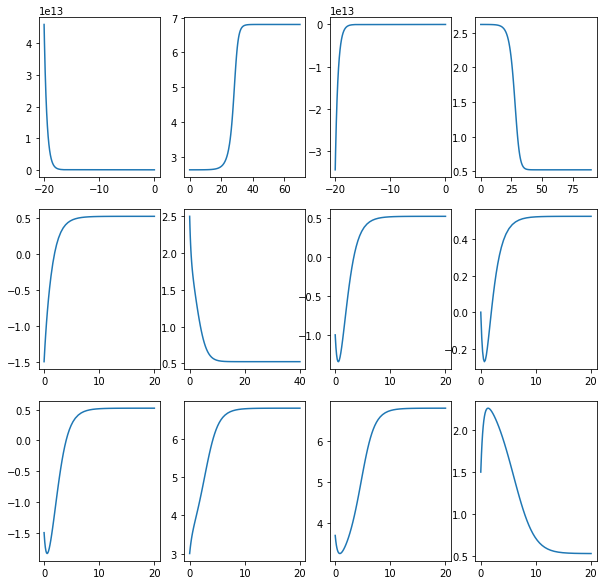

In [23]:
plt.figure(figsize=(10, 10))
for k in range(len(dep4[0])):
    x=dep4[1][k]
    t=dep4[0][k]
    plt.subplot(3, 4, k+1)
    plt.plot(t, x)

In [24]:
d=-2
#Уравнение для системы с сильным притоком энергии(d<<0)
def pendula4(freq):
    def rhs(t, X):
        x, y = X
        return [y, -d*y-sin(x)+0.5]
    return rhs

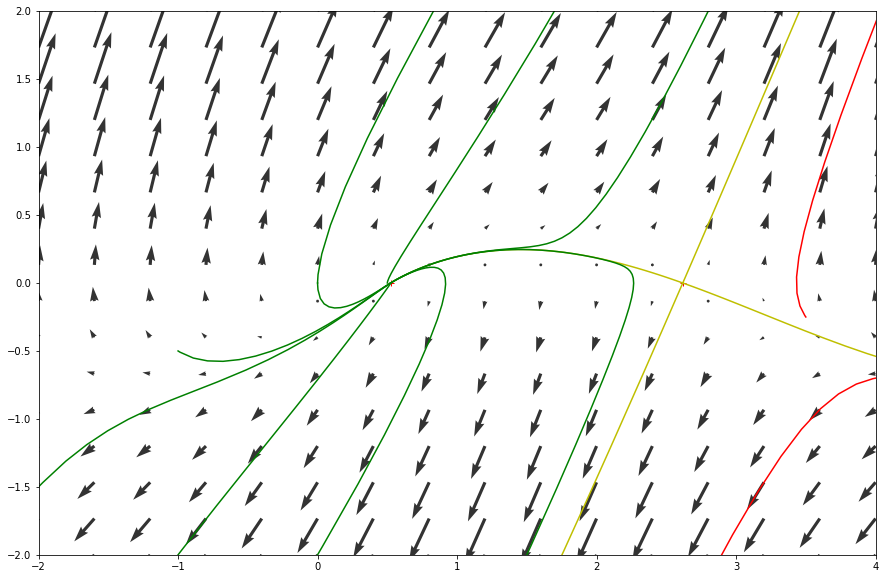

In [25]:
#Фазовый портрет для системы с сильным притоком энергии (d<<0)
freq=1
rhs=pendula4(freq)
limits=[(-2.0, 4.0), (-2.0, 2.0)]
dep5 = plotOnPlane2(rhs, [seps(np.pi*5/6, 0, d)[0], seps(np.pi*5/6, 0, d)[1], seps(np.pi*5/6, 0, d)[2], seps(np.pi*5/6, 0, d)[3], (-2, -1.5), (-1, -2), (0, -2), (1.5, -2), (-1, -0.5), (2.8, 2), (0.5, 0), (0, 0), (0, 0), (3.5, -0.25), (4, -0.7)],
             [20, -70, 20, -90, -20, -20, -20, -20, -20, -20, 20, -5, 10, 10, 10], 
             limits, 
             [seps(np.pi*5/6, 0, d)[4], seps(np.pi*5/6, 0, d)[4], seps(np.pi*5/6, 0, d)[4], seps(np.pi*5/6, 0, d)[4], 'g-', 'g-', 'g-', 'g-', 'g-', 'g-', 'g-', 'g-', 'g-', 'r-', 'r-'], d)

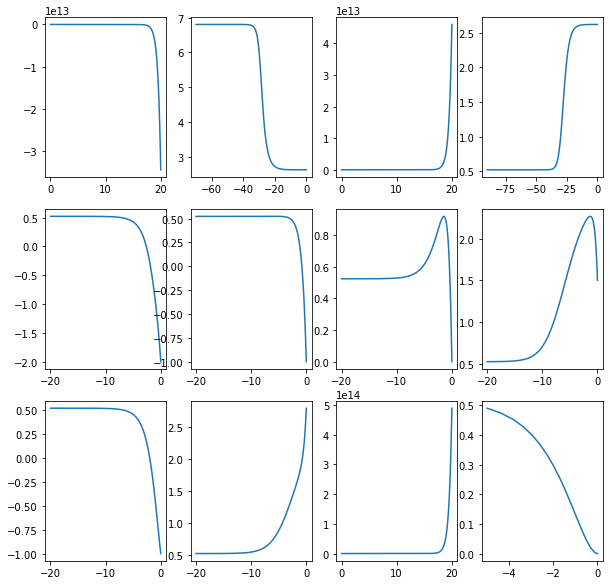

In [26]:
plt.figure(figsize=(10, 10))
for k in range(len(dep4[0])):
    x=dep5[1][k]
    t=dep5[0][k]
    plt.subplot(3, 4, k+1)
    plt.plot(t, x)